In [1]:
from plot_days_info import plot_mass
from create_days_df import create_days_df_from_dj
import dj_utils as dju
from datetime import datetime, timedelta
import matplotlib.pyplot as plt

from pathlib import Path
import datajoint as dj
import pandas as pd
import numpy as np

ratinfo = dj.create_virtual_module("intfo", "ratinfo")

[2023-07-31 18:35:25,811][INFO]: Connecting jbreda@bdata00.pni.princeton.edu:3306
[2023-07-31 18:35:26,204][INFO]: Connected jbreda@bdata00.pni.princeton.edu:3306


In [2]:
# ANIMALS
ANIMAL_IDS = ["R512"]
n_animals = len(ANIMAL_IDS)

# DATES
date_min, date_max = dju.return_date_window(latest_date=None, n_days_back=20)

In [3]:
subject_key = [{"ratname": animal_id} for animal_id in ANIMAL_IDS]
mass_date_min_key = f"date >= '{date_min}'"
mass_date_max_key = f"date <= '{date_max}'"


mass_df = pd.DataFrame(
    (ratinfo.Mass & subject_key & mass_date_min_key & mass_date_max_key).fetch(
        "ratname", "date", "mass", as_dict=True
    )
)
mass_df.rename(columns={"ratname": "animal_id"}, inplace=True)

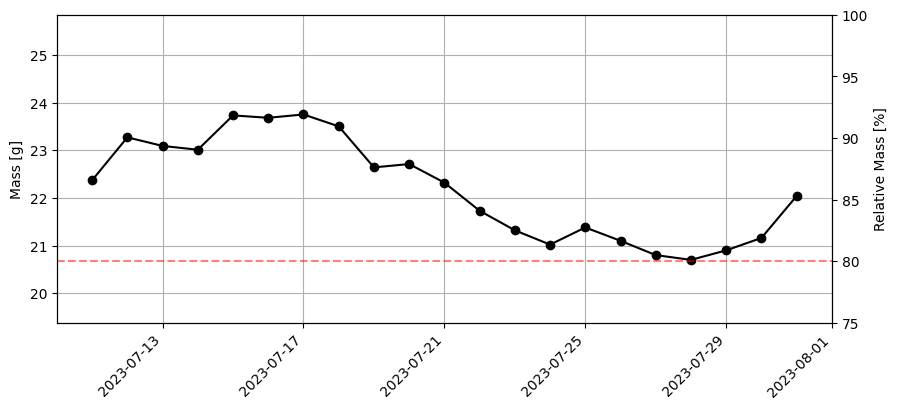

In [4]:
fig, ax = plt.subplots(n_animals, 1, figsize=(10, 4 * n_animals))

if n_animals == 1:
    plot_mass(mass_df, ax, title=ANIMAL_IDS[0])
else:
    for ii, id in enumerate(ANIMAL_IDS):
        animal_df = mass_df.query("animal_id == @id")
        plot_mass(animal_df, ax[ii], title=id)